# Chapter 3: Linguistic features

### Parts of Speech Tags

In [ ]:
import spacy

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
doc = nlp("I will ship the package tomorrow.") 

In [6]:
#spacy.explain provides parts of speech tag explanations

for token in doc:
    print(f"{token.text}  tag: {token.tag_}  explain: {spacy.explain(token.tag_)}") 

I   tag: PRP   explain: pronoun, personal
will   tag: MD   explain: verb, modal auxiliary
ship   tag: VB   explain: verb, base form
the   tag: DT   explain: determiner
package   tag: NN   explain: noun, singular or mass
tomorrow   tag: NN   explain: noun, singular or mass
.   tag: .   explain: punctuation mark, sentence closer


### Visualize dependency labels

In [21]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_md")

doc = nlp("I own a ginger cat.")

displacy.render(doc, style= "dep") #dep style parameter

#filename = "cat_line.svg" 
#output_path = Path ("/Learning/spaCy" + file_name)
#output_path.open("w", encoding = "utf-8").write(svg)



### Extracting named entities from website

In [7]:
from bs4 import BeautifulSoup 
import requests 
import spacy 


In [8]:
def url_text(url_string):
    res = requests.get(url_string)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        text = soup.get_text()
        return " ".join(text.split()) 

In [9]:
herbs = url_text("https://www.henriettes-herb.com/eclectic/kings/abies-cana.html") 
nlp = spacy.load("en_core_web_md") 
doc = nlp(herbs)

In [10]:
len(doc.ents)

64

In [13]:
from collections import Counter

In [14]:
#counting entity labels
labels = [ent.label_ for ent in doc.ents]

In [15]:
Counter(labels)

Counter({'ORG': 15,
         'PERSON': 14,
         'DATE': 7,
         'GPE': 7,
         'NORP': 1,
         'QUANTITY': 3,
         'CARDINAL': 14,
         'ORDINAL': 1,
         'TIME': 1,
         'WORK_OF_ART': 1})

In [16]:
#counting the tokens
items = [ent.text for ent in doc.ents]

In [17]:
Counter(items).most_common(25)

[('5', 3),
 ('American Dispensatory', 2),
 ('1898', 2),
 ('Tsuga', 2),
 ('Canada', 2),
 ('Kennedy', 2),
 ('10', 2),
 ('2', 2),
 ('Henriette Kress', 2),
 ('Abies Canadensis.—Hemlock Spruce', 1),
 ("Henriette's", 1),
 ("Luentoja King's", 1),
 ('Abies Nigra.—Black Spruce - Pix Burgundica', 1),
 ('Abies', 1),
 ('Michaux', 1),
 ('Linné', 1),
 ('Picea', 1),
 ('Hemlock', 1),
 ('above 75 feet', 1),
 ('about half an inch', 1),
 ('two', 1),
 ('Chemical Composition.—The Hemlock', 1),
 ('the Northern States', 1),
 ('second', 1),
 ('Phil', 1)]

In [18]:
print(doc.ents)

(Abies Canadensis.—Hemlock Spruce, Henriette's, Luentoja King's, American Dispensatory, 1898, Tsuga, Abies Nigra.—Black Spruce - Pix Burgundica, Abies, Michaux, Linné, Picea, Tsuga, Hemlock, above 75 feet, about half an inch, two, Chemical Composition.—The Hemlock, the Northern States, Canada, Canada, second, Phil, Vol, II, 20, Schimmel & Co., Semi-Annual, Oct., 1893, 0.907, 15°, 59° F., 54, Two, Kennedy, Kennedy, Medical Uses, ani, W. K. Everson, morbus, 5, 10, 10 or 20 minutes, 5, 30, 2, 10, 2, 5, American Dispensatory, 1898, Harvey Wickes Felter, M.D., John Uri Lloyd, Phr, Abies Nigra.—Black Spruce, today, Distanskurs Lär, Classic Texts Archives, Henriette, 1995, Henriette Kress, Helsinki, Finland, 1995–2021, Henriette Kress)


### displaCy Named Entity Visualizer

In [22]:
import spacy
from spacy import displacy

In [23]:
nlp = spacy.load("en_core_web_sm")

text = "This study pointed to the assessment of the chemical composition (F, Ca, Mg, Na, K, Fe, Mn, Zn, Cu, Ni, Co, Cr, Cd, and carbohydrate) of different marine seaweeds (red, green, and brown) from the Egyptian Mediterranean Sea coast. The results showed that green seaweeds supplied better calcium sources than the red and brown ones.Also, red and brown seaweeds showed higher averages of Na and K than that in green species and these seaweeds could play an important role in the electrolyte balance in humans."
doc = nlp(text)
displacy.render(doc, style="ent")

In [24]:
## Predicting named entities in context

import spacy
nlp = spacy.load("en_core_web_sm")

text = "This study pointed to the assessment of the chemical composition (F, Ca, Mg, Na, K, Fe, Mn, Zn, Cu, Ni, Co, Cr, Cd, and carbohydrate) of different marine seaweeds (red, green, and brown) from the Egyptian Mediterranean Sea coast. The results showed that green seaweeds supplied better calcium sources than the red and brown ones.Also, red and brown seaweeds showed higher averages of Na and K than that in green species and these seaweeds could play an important role in the electrolyte balance in humans."
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label)

Mn 384
Zn 384
Cu 384
Egyptian 381
Mediterranean Sea 385


### Grouping a multi-word token

In [ ]:
doc = nlp("She lived in New Hampshire")

In [ ]:
doc.ents

In [ ]:
[(token.text, token.i) for token in doc] #New and Hampshire not captured as one token

In [ ]:
len(doc)

In [ ]:
#doc.retokenize() correct tool for merging and splitting spans. Here merging:
with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[3:5])
    attrs = {"LEMMA": "new hampshire"}

In [ ]:
[(token.text, token.i) for token in doc]

### Breaking apart a multi-word token

In [5]:
doc = nlp("She live in NewHampshire")

In [ ]:
len(doc)

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.tag_, token.dep_)

In [ ]:
#doc.retokenize() correct tool for merging and splitting spans.
with doc.retokenize() as retokenizer:
    heads = [(doc[3], 1), doc[2]] #doc[3] will be the +1th position token in new setup
    attrs = {"TAG": ["NNP", "NNP"], "DEP": ["pobj", "compound"]}
    retokenizer.split(doc[3], ["New", "Hampshire"], heads=heads, attrs=attrs)

In [ ]:
[(token.text, token.lemma_, token.i) for token in doc]

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.tag_, token.dep_)

# Chapter 4

### Using the Matcher

In [ ]:
# Matcher class can match our predefined rules to the sequesnce of tokens in Doc and Span objects

In [ ]:
import spacy

In [8]:
from spacy.matcher import Matcher

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [9]:
doc = nlp("Good morning, I want to reserve a ticket. I will then say good evening!")

In [10]:
#matcher needs to be initialized with vocabulary object
matcher = Matcher(nlp.vocab)

In [11]:
pattern1 = [{"LOWER": "good"}, {"LOWER": "morning"}, {"IS_PUNCT": True}]

In [12]:
#introduce pattern to matcher
matcher.add("morningGreeting", [pattern1])

In [13]:
pattern2 = [{"LOWER": "good"},{"LOWER": "evening"}, {"IS_PUNCT": True}]

In [14]:
matcher.add("eveningGreeting", [pattern2])

In [15]:
matches = matcher(doc)

In [16]:
for match_id, start, end in matches:
    pattern_name = nlp.vocab.strings[match_id]
    m_span = doc[start:end]
    print(start, end, m_span.text)

0 3 Good morning,
14 17 good evening!


In [ ]:
#Example 2 Pattern on 2 sentences + other attributes
doc1 = nlp("Can you swim?")
doc2 = nlp("Can Sally swim?")

In [ ]:
pattern = [{"IS_SENT_START": True, "LOWER": "can"}, {"IS_TITLE": True}] #put two attributes

In [ ]:
matcher.add("canThenCapitalized", [pattern])

In [ ]:
matcher(doc)

In [ ]:
matches = matcher(doc2)

In [ ]:
len(matches)

In [ ]:
mid, start, end = matches[0]

In [ ]:
print(start, end, doc2[start:end]) 
#prints only first token in sentence is can and second word has a capitalized letter

In [ ]:
#Example 3 - One way of finding yes/no question sentences
doc = nlp("Will you go there?")

In [ ]:
pattern = [{"IS_SENT_START": True, "TAG": "MD"}]

In [ ]:
matcher.add("sentStartingAuxVerb", [pattern])

In [ ]:
matches = matcher(doc)

In [ ]:
len(matches)

In [ ]:
mid, start, end = matches[0]

In [ ]:
print(start, end, doc[start:end])

In [ ]:
doc2 = nlp("I might go there.")

In [ ]:
matcher(doc2)

In [ ]:
#Example 4 - using extended syntax - using in
doc = nlp("Good morning, I'm here. I'll say good evening!!") 

pattern = [{"LOWER": "good"},{"LOWER": {"IN": ["morning", "evening"]}},
           {"IS_PUNCT": True}] 

matcher.add("greeting",[pattern]) 

matches = matcher(doc) 

for mid, start, end in matches:
    print(start, end, doc[start:end]) 





In [ ]:
#Example 4 - using extended syntax - regex ? (zero or one times)
doc1 = nlp("Barack Obama visited France.") 
doc2 = nlp("Barack Hussein Obama visited France.") 
pattern = [{"LOWER": "barack"}, {"LOWER": "hussein", "OP": "?"},
           {"LOWER": "obama"}] 

matcher.add("obamaNames", [pattern]) 
matcher(doc1)  
matcher(doc2) 



In [ ]:
#Example 5, using * (zero or more times)
doc1 = nlp("Hello hello hello, how are you?") 
doc2 = nlp("Hello, how are you?") 
doc3 = nlp("How are you?") 

pattern = [{"LOWER": {"IN": ["hello", "hi", "hallo"]}, "OP":"*"}, {"IS_PUNCT": True}] 

matcher.add("greetings", [pattern]) 
            
for mid, start, end in matcher(doc1):
            print(start, end, doc1[start:end]) 

In [ ]:
#Example 6 using the wildcard
doc = nlp("My name is Alice and his name was Elliot.") 

pattern = [{"LOWER": "name"},{"LEMMA": "be"},{}] 
matcher.add("pickName", [pattern]) 

for mid, start, end in matcher(doc):
    print(start, end, doc[start:end]) 


In [ ]:
#Example 7 using the wildcard to ignore a token

doc1 = nlp("I forwarded his email to you.") 
doc2 = nlp("I forwarded an email to you.") 
doc3 = nlp("I forwarded the email to you.") 

pattern = [{"LEMMA": "forward"}, {}, {"LOWER": "email"}] 
matcher.add("forwardMail", [pattern]) 

for mid, start, end in matcher(doc1):
    print(start, end, doc1[start:end]) 

In [ ]:
for mid, start, end in matcher(doc2):
    print(start, end, doc2[start:end]) 

In [ ]:
for mid, start, end in matcher(doc3):
    print(start, end, doc3[start:end]) 

In [ ]:
#Example 8 Regex support -  selecting variations of traveled
doc1 = nlp("I travelled by bus.") 
doc2 = nlp("She traveled by bike.") 

pattern = [{"POS": "PRON"}, {"TEXT": {"REGEX": "[Tt]ravell?ed"}}] 

matcher.add("travelRegex", [pattern]) 

for mid, start, end in matcher(doc1): 
    print(start, end, doc1[start:end]) 

for mid, start, end in matcher(doc2): 
    print(start, end, doc2[start:end]) 

In [ ]:
#Example 9 - using regex to select all verbs
doc = nlp("I went to Italy; he has been there too. His mother also has told me she wants to visit Rome.") 

pattern = [{"TAG": {"REGEX": "^V"}}] 

matcher.add("verbs", [pattern])

for mid, start, end in matcher(doc):
    print(start, end, doc[start:end]) 


In [ ]:
#Example 10 - Using PhraseMatcher to match long dictionaries
import spacy 
from spacy.matcher import PhraseMatcher 

nlp = spacy.load("en_core_web_sm") 

matcher = PhraseMatcher(nlp.vocab) 

terms = ["Angela Merkel", "Donald Trump", "Alexis Tsipras"] 

patterns = [nlp.make_doc(term) for term in terms] 

matcher.add("politiciansList", None, *patterns) 

doc = nlp("3 EU leaders met in Berlin. German chancellor Angela Merkel first welcomed the US president Donald Trump. The following day Alexis Tsipras joined them in Brandenburg.")

matches = matcher(doc) 

for mid, start, end in matches: 
    print(start, end, doc[start:end])


In [ ]:
#Example 11 Matching Shape attribute
matcher = PhraseMatcher(nlp.vocab, attr="SHAPE")

ip_nums = ["127.0.0.0", "127.256.0.0"] 
patterns = [nlp.make_doc(ip) for ip in ip_nums]

matcher.add("IPNums", None, *patterns) 

doc = nlp("This log contains the following IP addresses: 192.1.1.1 and 192.12.1.1 and 192.160.1.1 .") 

for mid, start, end in matcher(doc):
    print(start, end, doc[start:end]) 



In [ ]:
#Example 12 Matching entity and verb/action

pattern = [{"ENT_TYPE": "PERSON", "OP": "+"}, {"POS" : "VERB"}]

matcher.add("personEntAction", [pattern])

doc = nlp("Today German chancellor Angela Merkel met with the US president.") 

matches = matcher(doc)

for mid, start, end in matches:
    print(start, end, doc[start:end]) 

### Rule Based Entity Extraction

In [ ]:
#Entity Ruler allows us to add rules on top of the stat model and creates a more powerful NER model.
#ER is a pipeline


In [ ]:
import spacy
from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_md")
doc = nlp("I have an acccount with chime since 2017")
print(doc.ents)

patterns = [{"label": "ORG", "pattern": [{"LOWER": "chime"}]}]
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns(patterns)
doc2 = nlp("I have an acccount with chime since 2017")

print(doc2.ents)
print(doc2[5].ent_type_)

### Linguistic features + named entities

In [ ]:
#using POS tag information, dependency labels and named entities
doc = nlp("Einstein lived in Zurich.") 
[(ent.text, ent.label_) for ent in doc.ents]

person_ents = [ent for ent in doc.ents if ent.label_ == "PERSON"]

#We use head of the entity's last token 
#Check if the children of live contains prepositional attachment
for person_ent in person_ents:
    head = person_ent[-1].head
    if head.lemma_ == "live":
            preps = [token for token in head.children if token.dep_ == "prep"]
            for prep in preps:
                places = [token for token in prep.children if token.ent_type_ == "GPE"]
            print({'person': person_ent, 'city': places,'past': head.tag_ == "VBD"}) 

 

# Chapter 5 Word Vectors

In [ ]:
#Semantic similarity
doc1 = nlp("I visited England.")
doc2 = nlp("I went to London.") 

doc1[1:3].similarity(doc2[1:4]) # for 2 spans

#comparing two token objects
doc1[2].similarity(doc2[3]) 

#comparing two docs
doc1.similarity(doc2) 


In [ ]:
#Visualizing distance between vectors
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import numpy as np 
import spacy 

nlp = spacy.load("en_core_web_md")

vocab = nlp("cat dog tiger elephant bird monkey lion cheetah burger pizza food cheese wine salad noodles macaroni fruit vegetable") 

words = [word.text for word in vocab] 

vecs = np.vstack([word.vector for word in vocab if word.has_vector]) 

pca = PCA(n_components=2) 
vecs_transformed = pca.fit_transform(vecs) 

plt.figure(figsize=(20,15)) 
plt.scatter(vecs_transformed[:,0], vecs_transformed[:,1]) 

for word, coord in zip(words, vecs_transformed):
    x,y = coord
    plt.text(x,y,word, size=15)

plt.show() 
 


In [ ]:
#Categorizing text with semantic similarity
sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.  ")
key = nlp("perfume") 

for sent in sentences.sents:
    print(sent.similarity(key)) 



In [ ]:
#Extracting key phrases
doc = nlp("My beautiful and cute dog jumped over the fence") 

doc.noun_chunks 

list(doc.noun_chunks)

In [ ]:
for sent in sentences.sents: #iterate over sentences
    nchunks = [nchunk.text for nchunk in sent.noun_chunks] #extract noun chunks
    nchunk_doc = nlp(" ".join(nchunks)) #joined noun chunks in the list into a string
    print(nchunk_doc.similarity(key)) #compared the doc object noun chunks to key

In [ ]:
#Extracting and comparing named entities (proper nouns)
doc1 = nlp("Google Search, often referred as Google, is the most popular search engine nowadays.") 
doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.") 
doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.") 
print(doc1.ents)
print(doc2.ents) 
print(doc3.ents)

#Compare similarity score
ents1 = [ent.text for ent in doc1.ents] 
ents2 = [ent.text for ent in doc2.ents] 
ents3 = [ent.text for ent in doc3.ents] 

ents1 = nlp(" ".join(ents1))
ents2 = nlp(" ".join(ents2))
ents3 = nlp(" ".join(ents3))
print(ents1.similarity(ents2)) 
print(ents1.similarity(ents3)) 
print(ents2.similarity(ents3)) 




# Chapter 6 Semanting Parsing

In [ ]:
import pandas as pd

In [ ]:
#Extracting named entities
#Using dependency relations for intent recognition
#Semantic similarity methods for semantic parsing 

dataset = pd.read_csv("/Users/tdubon/Documents/GitHub/Mastering-spaCy/Chapter06/data/atis_intents.csv", header=None)

In [ ]:
#first column  intent, second column user utterances.
dataset.head()

In [ ]:
for text in dataset[1].head():
    print(text)

In [ ]:
#frequency of utterances by intent 
grouped = dataset.groupby(0).size()
print(grouped)

In [ ]:
#the frequency of each label
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_md")
corpus = open("/Users/tdubon/Documents/GitHub/Mastering-spaCy/Chapter06/data/atis_utterances.txt", "r").read().split("\n")
    
all_ent_labels = [] 
for sentence in corpus: 
    doc = nlp(sentence.strip()) 
    ents = doc.ents 
    all_ent_labels += [ent.label_ for ent in ents] 

c = Counter(all_ent_labels) 
print(c) 


In [ ]:
#observe many GPE labels - extracting location entities using Matcher
# using ADP and GPE (part of speech and entity type) pattern
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_md")
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "ADP"}, {"ENT_TYPE": "GPE"}] #pattern matching 2 tokens - preposition (ADP = adpositin) and location entity
matcher.add("prepositionLocation", [pattern])
doc = nlp("show me flights from denver to boston on tuesday") #test it

matches = matcher(doc)

for mid, start, end in matches:
    print(doc[start:end]) 

#inspect the text for variations in usage and whether the matcher catches these (such as abbreviations and others)

In [ ]:
#Extract the locations using the ORG entity label

pattern = [{"ENT_TYPE": "ORG", "OP": "+" }] #to capture one or more occurences, we use the + operator
matcher.add("AirlineName", [pattern]) 
doc = nlp("what is the earliest united airlines flight flying from denver")

matches = matcher(doc) 

for mid,start,end in matches:
    print(doc[start:end]) 


In [ ]:
#Extract the dates and times using ENT_TYPE: DATE and ENT_TYPE: TIME entity labels

pattern = [{"ENT_TYPE": "DATE"}, {"ENT_TYPE": "TIME"}] 
matcher.add("DatesTimes", [pattern]) 
doc = nlp("what is the earliest united airlines flight flying from denver on January 2022")

matches = matcher(doc) 

for mid,start,end in matches:
    print(doc[start:end]) 

In [ ]:
#Extract abbreviations on type entities
nlp = spacy.load("en_core_web_md") 

pattern1 = [{"TEXT": {"REGEX": "\w{1,2}\d{1,2}"}}] #matches single token like d1, d10, ad1
pattern2 = [{"SHAPE": { "IN": ["x", "xx"]}}, {"SHAPE": { "IN": ["d", "dd"]}}] #matches two token abbrev like ap 5, ap 57, a 5
pattern3 = [{"TEXT": {"IN": ["class", "code", "abbrev", "abbreviation"]}}, {"SHAPE": { "IN": ["x", "xx"]}}] #matches two tokens
pattern4 = [{"POS": "NOUN", "SHAPE": { "IN": ["x", "xx"]}}] #matches 1-2 letter words with NOUN POS tag

matcher = Matcher(nlp.vocab) 
matcher.add("abbrevEnts", [pattern1, pattern2, pattern3, pattern4]) 

sentences = [
'what does restriction ap 57 mean',
'what does the abbreviation co mean',
'what does fare code qo mean',
'what is the abbreviation d10',
'what does code y mean',
'what does the fare code f and fn mean',
'what is booking class c'
]


for sent in sentences:
   doc = nlp(sent)
   matches = matcher(doc)
   for mid, start, end in matches:
     print(doc[start:end])

In [ ]:
#Using dependency trees to extract entities
# iterating the utterance dependency trees to find out whether the preposition to is syntactically related to the location entity
import spacy 

nlp = spacy.load("en_core_web_md") 

def reach_parent(source_token, dest_token):
    source_token = source_token.head #retrieving the head, starting with source token
    while source_token != dest_token: #iterate over the head of each token - stops when reaches the source or root
        if source_token.head == source_token:
            return None
        source_token = source_token.head
        return source_token
    
doc = nlp("I'm going to a conference in Munich.")
print(doc[-2])
print(doc[3])   
print(doc[-1]) 

print(reach_parent(doc[-2], doc[3]))
print(reach_parent(doc[-1], doc[3]))

### Dependency relations for intent recognition

In [ ]:
#Recognizing intent
import spacy 
nlp = spacy.load("en_core_web_md")

doc = nlp("find a flight from washington to sf")

for token in doc:
    if token.dep_ == "dobj": #search for dependency label dobj
        print(token.head.text + token.text.capitalize()) #finding dobj's syntactic head



In [ ]:
#Extracting multiple intents with conjunction relation - intent: show flights
#extracting the direct object and its conjuncts

import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp("show all flights and fares from denver to san francisco")

for token in doc:
    if token.dep_ == "dobj": #loop over all tokens to find the direct object
        dobj = token.text
        conj = [t.text for t in token.conjuncts]  #obtained conjuncts
        verb = token.head.text #obtain transitive verb
        #print(dobj, conj)

print(verb, dobj, conj)


In [ ]:
#Extracting intent requiring deeper investigation of sentence structure - using list of helper verbs

doc = nlp("i want to make a reservation for a flight")

dObj= None
tVerb = None 

# Extract the direct object and its transitive verb
for token in doc:
    if token.dep_ == "dobj": #locate direct obj
        dObj = token
        tVerb = token.head #transitive verb

# Extract the helper verb 
intentVerb = None 
verbList = ["want", "like", "need", "order"]

if tVerb.text in verbList: #check transitive verb against verb list
    intentVerb = tVerb
else:
    if tVerb.head.dep_ == "ROOT":
        helperVerb = tVerb.head #check the main verb of the sentence, head of transitive root
        

# Extract the object of the intent 
intentObj = None
objList = ["flight", "meal", "booking"] #list of the possible object words we want to extract

if dObj.text in objList:
    intentObj = dObj 
else:
    for child in dObj.children: #if dobj not in list, check its synt. children
        if child.dep_ == "prep": #check whether a preposition
            intentObj = list(child.children)[0] #if yes, is the child a preposition of the dobj
            break
        elif child.dep_ == "compound": #if not prepos, check whether it is a compound
            intentObj = child
            break

print(helperVerb.text + intentObj.text.capitalize()) 

 

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = "This study pointed to the assessment of the chemical composition (F, Ca, Mg, Na, K, Fe, Mn, Zn, Cu, Ni, Co, Cr, Cd, and carbohydrate) of different marine seaweeds (red, green, and brown) from the Egyptian Mediterranean Sea coast."
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)


### Semantic Parsing with List of Synonyms Comparison

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

#Include only the base form of the verbs and nouns
#Each set includes the set of synonyms
verbSynsets = [ ("show", "list"), ("book", "make a reservation", "buy", "reserve") ] 

objSynsets = [ ("meal", "food"), ("aircraft", "airplane", "plane") ] 


In [ ]:
#Comparing similarity of two utterances - Construct doc objects for each utterance 

doc = nlp("show me all aircrafts that cp uses")

doc2 = nlp("list all meals on my flight") 


In [ ]:
[token.dep_ for token in doc2]

In [ ]:
#Extract transitive verb and direct object of each utterance

for token in doc:
    if token.dep_ == "dobj":
        obj = token.lemma_
        verb = token.head.lemma_
        break 
        
for token in doc2:
    if token.dep_ == "dobj":
        obj2 = token.lemma_
        verb2 = token.head.lemma_
        break 
        
print(verb, obj)
print(verb2, obj2)

In [ ]:
#Identify the VERB synonyms in our list that appear in the user utterances
vsyn = [syn for syn in verbSynsets if verb in syn]
print(vsyn[0])
print(verb2 in vsyn[0])


In [ ]:
#Identify the synonyms for DOBJ in our list that appear in the user utterances
osyn = [syn for syn in objSynsets if obj in syn]
print(osyn[0])
print(obj2 in osyn[0]) #object2 - meal - is not in list. Do not refer to same intent


### Semantic Parsing using Word Vectors

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

In [ ]:
#Comparing similarity of two utterances - Construct doc objects for each utterance 

doc = nlp("show me all aircrafts that cp uses")

doc2 = nlp("list all meals on my flight") 

In [ ]:
#Extract transitive verb and direct object of each utterance
for token in doc:
    if token.dep_ == "dobj":
        obj = token
        verb = token.head
        break 


In [ ]:
for token in doc2:
    if token.dep_ == "dobj": #note this is object of the preposition
        obj2 = token
        verb2 = token.head
        print(obj2, verb2)
        break 
        

In [ ]:
verb, obj
verb2, obj2

In [ ]:
#calculate semantic similarity between the two direct objects
obj.similarity(obj2) #low score

In [ ]:
#calculate similarity between the two verbs
verb.similarity(verb2) #low score - not related

### Intent recognition

In [ ]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_md")


In [ ]:
#step 1: extract entities
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "ADP"}, {"ENT_TYPE": "GPE"}] #ADP for adpositions 

matcher.add("prepositionLocation", [pattern]) 

# Location entities 
doc = nlp("show me flights from denver to philadelphia on tuesday")
matches = matcher(doc) 

for mid, start, end in matches:
    print(doc[start:end]) 

#all entities
ents = doc.ents
print(ents)

In [ ]:
#step 2: perform intent recognition

for token in doc:
    if token.dep_ == "dobj":
        print(token.head.lemma_ + token.lemma_.capitalize())

In [ ]:
{ 
    'utterance': 'show me flights from denver to philadelphia on tuesday', 
    'intent ': ' showFlight', 
    'entities': {
        'date': 'tuesday',
        'locations': {
            'from': 'denver',
            'to': 'philadelphia'
        }
    } 
} 

## Chapter 7

In [ ]:
#Are the entities and labels captured in the results
import spacy
nlp = spacy.load("en_core_web_md")

doc1 = nlp("navigate to my home")
print(doc1.ents)

doc2 = nlp("navigate to Oxford Street")
print(doc2.ents)

In [ ]:
print(doc2.ents[0].label_)
print(spacy.explain("ORG")) 

In [ ]:
#Home was not detected
#Train NER component to recognize street names - add new entity type with EntityRuler


### Creating an annotation

In [ ]:
## Prepare training data
## Feed the raw text and annotations directly to spaCy

import spacy
from spacy.training import Example


nlp = spacy.load("en_core_web_md")
doc = nlp("I will visit you in Munich")


In [ ]:
annotations = {"entities": [(20, 26, "GPE")]} 

#doc object and annotations fed into Example.from_dict()
example_sent = Example.from_dict(doc, annotations) 



In [ ]:
#add annotation to NER component

#Disable other pipes - train only the one needed
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
nlp.disable_pipes(*other_pipes) 

#Another way of writing this code is as follows: 
#other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner'] 
#with nlp.disable_pipes(*other_pipes):    
    # training code goes here 

### Creating a custom Named Entity Recognition model

In [ ]:
#Train the NER model
import random
import spacy
from spacy.training import Example
from spacy.language import Language
from pathlib import Path

from __future__ import unicode_literals, print_function

nlp = spacy.load("en_core_web_md")

In [ ]:
# Define navigation domain training set sentences
trainset = [("navigate home", {"entities": [(9,13, "GPE")]}),
            ("navigate to office", {"entities": [(12,18, "GPE")]}),
            ("navigate", {"entities": []}), 
            ("navigate to Oxford Street", {"entities": [(12, 25, "GPE")]})] 




In [ ]:
#setup variables
model = None
output_dir=Path("/Users/tdubon/spaCy_models")
n_iter=100

In [ ]:
#load the model

if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.load('en_core_web_md')  


#set up the pipeline
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

In [ ]:
#Disable other pipes
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

#add labels
#for _, annotations in trainset:
#    for ent in annotations.get('entities'):
#        ner.add_label(ent[2])

 #define component       
def ner_component(data):
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.create_optimizer()
        for i in range(epochs):
            random.shuffle(trainset)
            for text, annotation in data:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotation)
                print(nlp.update([example], sgd=optimizer))

ner_component(trainset)
nlp.pipe_names

In [ ]:
#run model on data it was trained on
for text, _ in trainset:
    doc = nlp(text)
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

In [ ]:
#Evaluate updated NER model
sents = [("navigate to my house"), 
          ("drive me home"),
          ("navigate to Soho"),
          ("navigate to my building"), 
         ("I watched a documentary about Lady Diana")] 

for i in sents:
           doc = nlp(i)
           print(doc.ents)
           print(doc.ents[0].label_)

In [ ]:
#Saving custom model 
def save_model(output_dir):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)
        
save_model(output_dir)

In [ ]:
### Loading custom model
nlp = spacy.load("/Users/tdubon/spaCy_models")


In [ ]:
#test
sents = [("navigate to my house"), 
          ("drive me home"),
          ("navigate to Soho"),
          ("navigate to my building"), 
         ("I watched a documentary about Lady Diana")]

for i in sents:
    doc = nlp(i)
    print([(ent.text, ent.label_) for ent in doc.ents])

## Saving and Loading Custom Models Created using pipelines

In [ ]:
#need to look at**************Po
import spacy

nlp = spacy.load('en_core_web_md', disable=['ner']) #load pipeline w/o ner so we can use ours
ner = nlp.create_pipe("ner") #create pipeline component
ner.from_disk("/Users/tdubon/spaCy_models/ner") #load custom component
nlp.add_pipe(ner, "ner") #add to pipeline
print(nlp.meta['pipeline']) 


## Training an NER pipeline component from scratch

In [ ]:
import random
import spacy
import json
from spacy.training import Example

nlp = spacy.load("en_core_web_md")

In [ ]:
with open("/Users/tdubon/Documents/GitHub/Mastering-spaCy/Chapter07/data/corona.json") as f:
    data = json.loads(f.read())

TRAIN_DATA = [] 
for (text, annotation) in data:
    new_anno = []
    for anno in annotation["entities"]:
        st, end, label = anno
        new_anno.append((st, end, label))
    TRAIN_DATA.append((text, {"entities": new_anno})) 


In [ ]:
#training data
train_set = [("Methylphenidate is effectively used in treating children with epilepsy and ADHD.", 
              {"entities": [(0, 15, "DRUG"), (62, 70, "DISEASE"), (75, 79, "DISEASE")]}),
             ("Patients were followed up for 6 months.", {"entities": []}),
             ("Antichlamydial antibiotics may be useful for curing coronary-artery disease.", {"entities": [(0, 26, "DRUG"), (52, 75, "DIS")]}) ] 

#entities to recognize
entities = ["DIS", "DRUG"]

#define the labels we need NER to recognize
labels = ['Pathogen', 'MedicalCondition', 'Medicine']


In [ ]:
#create a blank model
nlp = spacy.blank("en")
ner = nlp.add_pipe("ner")
print(ner)
print(nlp.meta)

In [ ]:
#add defined entity labels to model

for ent in labels:
    ner.add_label(ent)
    print(ner.labels) 


In [ ]:


#Disable other pipes
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

#define update component       
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for i in range(100):
        random.shuffle(TRAIN_DATA)
        for text, annotation in TRAIN_DATA:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotation)
            nlp.update([example], sgd=optimizer)





In [ ]:
nlp.pipe_names

In [ ]:
#Test component containing new training data
doc = nlp("I had a coronary disease")
print(f"{doc.ents}, {doc.ents[0].label_}") 

In [ ]:
from spacy import displacy 

doc = nlp("I had a coronary disease.") 
displacy.render(doc, style="ent") 


In [ ]:
doc2 = nlp("Pathogenic bacteria contribute to other globally important diseases, such as pneumonia, which can be caused by bacteria such as Streptococcus and Pseudomonas, and foodborne illnesses, which can be caused by bacteria such as Shigella, Campylobacter, and Salmonella.Pathogenic bacteria also cause infections such as tetanus, typhoid fever, diphtheria, syphilis, and leprosy. Pathogenic bacteria are also the cause of high infant mortality rates in developing countries.") 
displacy.render(doc2, style="ent") 


# Chapter 8

## Training a text classifier - using TextCategorizer

In [1]:
#import BINARY classifier
import spacy
import random
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

nlp = spacy.load("en_core_web_md")

#configure the TextCategorizer
config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL }

textcat = nlp.add_pipe("textcat", config=config) 

print(textcat)


In [2]:
train_data = [("I loved this product, very easy to use.", {"cats": {"POS": True}}),
              ("I'll definitely purchase again. I recommend this product.", {"cats": {"POS": True}}),
              ("This is the best product ever. I loved the scent and the feel. Will buy again.", {"cats": {"POS": True}}),
              ("Disappointed. This product didn't work for me at all", {"cats": {"NEG": True}}),
              ("I hated the scent. Won't buy again", {"cats": {"NEG": True}}),
              ("Truly horrible product. Very few amount of product for a high price. Don't recommend.", {"cats": {"NEG": True}}) ] 


In [3]:
textcat.add_label("POS")
textcat.add_label("NEG")
    
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data] 


In [4]:
textcat.initialize(lambda: train_examples, nlp=nlp)

In [5]:
#Define training example

epochs = 20

#Disable other pipe components & define training loop to incorporate statistical information

with nlp.select_pipes(enable="textcat"):
    optimizer = nlp.resume_training() #Creates optimizer object
    for i in range(epochs):
        random.shuffle(train_data)
        for text, label in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, label) 
            print(nlp.update([example], sgd=optimizer))
            



{'textcat': 0.25}
{'textcat': 0.2549639642238617}
{'textcat': 0.2512111961841583}
{'textcat': 0.25617092847824097}
{'textcat': 0.23683953285217285}
{'textcat': 0.27748462557792664}
{'textcat': 0.2318648397922516}
{'textcat': 0.21884527802467346}
{'textcat': 0.26352161169052124}
{'textcat': 0.21494124829769135}
{'textcat': 0.25685396790504456}
{'textcat': 0.2165045589208603}
{'textcat': 0.2051442712545395}
{'textcat': 0.2490426003932953}
{'textcat': 0.2050033062696457}
{'textcat': 0.22427338361740112}
{'textcat': 0.1996849924325943}
{'textcat': 0.21593083441257477}
{'textcat': 0.19781598448753357}
{'textcat': 0.2628738284111023}
{'textcat': 0.14720141887664795}
{'textcat': 0.14142610132694244}
{'textcat': 0.27815133333206177}
{'textcat': 0.2532503604888916}
{'textcat': 0.11012145131826401}
{'textcat': 0.10882793366909027}
{'textcat': 0.2786612808704376}
{'textcat': 0.30029404163360596}
{'textcat': 0.09603079408407211}
{'textcat': 0.33497944474220276}
{'textcat': 0.2900579571723938}
{'te

In [6]:
#test
doc2 = nlp("This product sucks")

print(doc2.cats)

{'POS': 0.7234081625938416, 'NEG': 0.27659186720848083}


In [7]:
doc3 = nlp("This product is great")
print(doc3.cats)

{'POS': 0.7797467708587646, 'NEG': 0.22025315463542938}


## Multiclass Classification

In [1]:
## Training TextCategorizer for multilabel classification
train_data = [("It's the perfect movie for a Sunday evening.", {"cats": {"SUNDAY_EVENING": True}}),
              ("Very good thriller", {"cats": {"THRILLER": True}}),
              ("A great movie for the kids and all the family", {"cats": {"FAMILY": True}}),
              ("An ideal movie for Sunday night with all the family. My kids loved the movie.", {"cats": {"FAMILY": True, "SUNDAY_EVENING":True}}),
              ("A perfect thriller for all the family. No violence, no drugs, pure action.", {"cats": {"FAMILY": True, "THRILLER": True}})] 



In [5]:
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

nlp = spacy.load("en_core_web_md")

In [6]:
#setup configuration and add the respective pipe

config = {"threshold": 0.5, "model": DEFAULT_MULTI_TEXTCAT_MODEL}

textcat = nlp.add_pipe("textcat_multilabel", config=config) 
 

In [7]:
labels = ["FAMILY", "THRILLER", "SUNDAY_EVENING"]

for label in labels:
    textcat.add_label(label)
    
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data] 


In [8]:
textcat.initialize(lambda: train_examples, nlp=nlp)

In [9]:
epochs=20 

with nlp.select_pipes(enable="textcat_multilabel"):
    optimizer = nlp.resume_training()
    for i in range(epochs):
        random.shuffle(train_data)
        for text, label in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, label)
            nlp.update([example], sgd=optimizer) 


In [10]:
doc2 = nlp("Definitely in my Sunday movie night list")
doc2.cats

{'FAMILY': 0.7342678904533386,
 'THRILLER': 0.43685072660446167,
 'SUNDAY_EVENING': 0.8150126338005066}

## Fine Food Reviews Sentiment Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
reviews_df = pd.read_csv("/Users/tdubon/Documents/GitHub/Mastering-spaCy/Chapter08/data/Reviews.csv")

In [11]:
reviews_df.shape

(3999, 10)

In [15]:
reviews_df.head()

,Text,Score
0,To be fair only one of my twins got gas from t...,1
1,Just recieved our first order of these (they d...,5
2,This is a fantastic Chai Masala. I am very pic...,5
3,Flavorful and has added nutrition! You use le...,5
4,I thought this soup tasted good. I liked the t...,3


In [16]:
reviews_df = reviews_df[["Text", "Score"]].dropna()

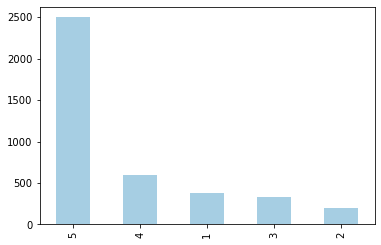

In [17]:
ax=reviews_df.Score.value_counts().plot(kind='bar', colormap='Paired') 
plt.show() 

In [19]:
reviews_df.Score[reviews_df.Score <= 3] = 0
reviews_df.Score[reviews_df.Score >= 4] = 1

/var/folders/zn/m0vy_yh17lb67mrm0jhh0ty40000gn/T/ipykernel_38050/362032454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.Score[reviews_df.Score <= 3] = 0
/var/folders/zn/m0vy_yh17lb67mrm0jhh0ty40000gn/T/ipykernel_38050/362032454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.Score[reviews_df.Score >= 4] = 1


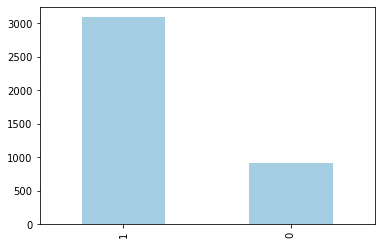

In [20]:
ax=reviews_df.Score.value_counts().plot(kind='bar', colormap='Paired') 
plt.show() 

In [21]:
reviews_df.head()

,Text,Score
0,To be fair only one of my twins got gas from t...,0
1,Just recieved our first order of these (they d...,1
2,This is a fantastic Chai Masala. I am very pic...,1
3,Flavorful and has added nutrition! You use le...,1
4,I thought this soup tasted good. I liked the t...,0


## Training a Text Classifier - predict positive/negative

In [23]:
import spacy
import random
from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL 
nlp = spacy.load("en_core_web_md") 


In [24]:
#setup configuration and add multilabel component to pipeline
config = { 

   "threshold": 0.5, 

   "model": DEFAULT_MULTI_TEXTCAT_MODEL 

} 

textcat = nlp.add_pipe("textcat_multilabel", config=config) 

In [25]:
#converting format that can be taken in by spaCy
train_examples = []

for index, row in reviews_df.iterrows():
    text = row["Text"]
    rating = row["Score"]
    label = {"POS": True, "NEG": False} if rating == 1 else {"NEG": True, "POS": False}
    train_examples.append(Example.from_dict(nlp.make_doc(text), {"cats": label}))

In [26]:
#setup labels and initialize textcat
textcat.add_label("POS") 
textcat.add_label("NEG") 
textcat.initialize(lambda: train_examples, nlp=nlp) 


In [27]:
#update nlp with statistical data
epochs = 2

with nlp.select_pipes(enable="textcat_multilabel"): 
    optimizer = nlp.resume_training()
    for i in range(epochs): 
        random.shuffle(train_examples)
        for example in train_examples:
            nlp.update([example], sgd=optimizer) 

In [28]:
doc2 = nlp("This is the best food I ever ate")
doc2.cats

{'POS': 0.9839656352996826, 'NEG': 0.02120601199567318}

In [29]:
doc3 = nlp("This food is so bad")
doc3.cats

{'POS': 0.2525370419025421, 'NEG': 0.7667326927185059}

## Text classification using Keras


In [30]:
data = [ "Tomorrow I will visit the hospital.",
        "Yesterday I took a flight to Athens.", "Sally visited Harry and his dog." ] 


In [31]:
import spacy
nlp = spacy.load("en_core_web_md")

#convert sentences to doc objects retrieve tokens
sentences = [[token.text for token in nlp(sentence)] for sentence in data] 


In [34]:
#inspect conversion
for sentence in sentences:
    print(sentence)

['Tomorrow', 'I', 'will', 'visit', 'the', 'hospital', '.']
['Yesterday', 'I', 'took', 'a', 'flight', 'to', 'Athens', '.']
['Sally', 'visited', 'Harry', 'and', 'his', 'dog', '.']


In [ ]:
# may be necessary to install
#!pip install tensorflow

In [52]:
#using Tokenizer object to turn word sequences to word-ID sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

#create tokenizer object
tokenizer = Tokenizer(lower=True) #lower all words
tokenizer.fit_on_texts(data) #to fit on sequence of words
tokenizer

In [53]:
#print results
tokenizer.word_index

{'i': 1,
 'tomorrow': 2,
 'will': 3,
 'visit': 4,
 'the': 5,
 'hospital': 6,
 'yesterday': 7,
 'took': 8,
 'a': 9,
 'flight': 10,
 'to': 11,
 'athens': 12,
 'sally': 13,
 'visited': 14,
 'harry': 15,
 'and': 16,
 'his': 17,
 'dog': 18}

In [54]:
#retrieve the word-IDs
tokenizer.texts_to_sequences(["hospital", "took"])

[[6], [8]]

In [55]:
#sequences_to_texts
tokenizer.sequences_to_texts([[3,2,1], [5,6,10]])

['will tomorrow i', 'the hospital flight']

In [56]:
#zero padding - zeros added to make vectors all the same length
#transform sentences into a sequence of word-ids
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
#sequences - list of list that correspond to word sequences
sequences = [[7], [8,1], [9,11,12,14]] 

MAX_LEN=4 

#pad the sequences
tf.keras.preprocessing.sequence.pad_sequences(sequences, MAX_LEN, padding="post")

array([[ 7,  0,  0,  0],
       [ 8,  1,  0,  0],
       [ 9, 11, 12, 14]], dtype=int32)

In [60]:
tf.keras.preprocessing.sequence.pad_sequences(sequences, MAX_LEN, padding="pre")

array([[ 0,  0,  0,  7],
       [ 0,  0,  8,  1],
       [ 9, 11, 12, 14]], dtype=int32)

## Keras implementation

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
import spacy
nlp = spacy.load("en_core_web_md") 

In [63]:
#import data set

reviews_df = pd.read_csv("/Users/tdubon/Documents/GitHub/Mastering-spaCy/Chapter08/data/Reviews.csv")
reviews_df.shape

(3999, 10)

In [65]:
#extract review text and review label from each dataset row to append to python list
train_examples = []
labels = []

for index, row in reviews_df.iterrows():
    text = row["Text"]
    rating = row["Score"]
    labels.append(rating)
    tokens = [token.text for token in nlp(text)]
    train_examples.append(tokens)    

In [66]:
train_examples[0]

['To',
 'be',
 'fair',
 'only',
 'one',
 'of',
 'my',
 'twins',
 'got',
 'gas',
 'from',
 'this',
 'but',
 'it',
 'was',
 'horrible',
 '.',
 'Up',
 'all',
 'night',
 'screaming',
 'from',
 'gas',
 'pains',
 '.',
 'Garbanzo',
 'beans',
 'are',
 'not',
 'an',
 'ideal',
 'food',
 'for',
 'young',
 'babies',
 '.']

In [68]:
#tokenize the data and create vocabulary
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [69]:
#apply sequences to list containing list of words
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(train_examples)

sequences = tokenizer.texts_to_sequences(train_examples)

In [70]:
sequences[0]

[7,
 40,
 1489,
 71,
 48,
 10,
 15,
 6075,
 159,
 1158,
 54,
 12,
 19,
 8,
 24,
 1187,
 1,
 69,
 44,
 661,
 6076,
 54,
 1158,
 3346,
 1,
 4895,
 387,
 22,
 23,
 76,
 1927,
 65,
 13,
 1667,
 1928,
 1]

In [72]:
#apply padding to end of vectors
MAX_LEN = 50

X = pad_sequences(sequences, MAX_LEN, padding="post")

X = np.array(X)
y = np.array(labels)

In [74]:
y = y.reshape(y.shape[0] , 1)
y.shape

(3999, 1)

In [75]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras import optimizers

In [76]:
#define the input layer
sentence_input = Input(shape=(None,)) #none - asks keras to infer the shape

#define the embedding layer, input dimension should be number of words in vocabulary +1
embedding =  Embedding(input_dim = len(tokenizer.word_index)+1, 
                       output_dim = 100)(sentence_input)

#feed word vectors to LSTM - units refer to hidden state dimension
LSTM_layer = LSTM(units=256)(embedding)

#convert output to one dimension using the sigmoid function (0 or 1 possible)
output_dense = Dense(1, activation='sigmoid')(LSTM_layer)

2022-01-21 07:59:42.202560: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [77]:
model = Model(inputs=[sentence_input],outputs=[output_dense])
model.summary()

#compile model with optimizer, loss function and eval. metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         1623900   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,989,725
Trainable params: 1,989,725
Non-trainable params: 0
_________________________________________________________________


In [78]:
#x is a list of training examples, y list of labels
model.fit(x=X,
          y=y,
          batch_size=64,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
50/50 [==============================] - 16s 272ms/step - loss: -62.1481 - accuracy: 0.0907 - val_loss: -93.3616 - val_accuracy: 0.1075
Epoch 2/5
50/50 [==============================] - 14s 279ms/step - loss: -115.8135 - accuracy: 0.0916 - val_loss: -133.5630 - val_accuracy: 0.1075
Epoch 3/5
50/50 [==============================] - 13s 266ms/step - loss: -156.2205 - accuracy: 0.0916 - val_loss: -172.4322 - val_accuracy: 0.1075
Epoch 4/5
50/50 [==============================] - 13s 258ms/step - loss: -195.6194 - accuracy: 0.0916 - val_loss: -210.6899 - val_accuracy: 0.1075
Epoch 5/5
50/50 [==============================] - 13s 262ms/step - loss: -234.6112 - accuracy: 0.0916 - val_loss: -249.1014 - val_accuracy: 0.1075


# Chapter 9

## Modeling with transformers and BERT

In [ ]:
!pip install transformers

### Method 1

In [81]:
#Tokenize
from transformers import BertTokenizer

#load pretraind model using .from_pretrained method
btokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#tokenize using .tokenize method
sentence = "He lived characteristically idle and romantic."
sentence = "[CLS] " + sentence + " [SEP]"
tokens = btokenizer.tokenize(sentence)

print(tokens)

#convert tokens to token ids using .convert_tokens_to_ids method
ids = btokenizer.convert_tokens_to_ids(tokens)
print(ids)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

['[CLS]', 'he', 'lived', 'characteristic', '##ally', 'idle', 'and', 'romantic', '.', '[SEP]']
[101, 2002, 2973, 8281, 3973, 18373, 1998, 6298, 1012, 102]


### Method 2

In [82]:
#previous code block (load pretrained model, tokenize, convert to token ids) can be implemented 
# + adding special tokens,  using encode method

from transformers import BertTokenizer
btokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
sentence = "He lived characteristically idle and romantic."

ids = btokenizer.encode(sentence)
ids

[101, 2002, 2973, 8281, 3973, 18373, 1998, 6298, 1012, 102]

### Method 3

In [85]:
#all steps, including padding, can be implemented using encode_plus
from transformers import BertTokenizer

btokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

sentence = "He lived characteristically idle and romantic."

encoded = btokenizer.encode_plus(text=sentence,
                                 add_special_tokens=True,
                                 max_length=12,
                                 pad_to_max_length=True,
                                 return_tensors="tf" )

token_ids = encoded["input_ids"]
print(token_ids) 



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


tf.Tensor([[  101  2002  2973  8281  3973 18373  1998  6298  1012   102     0     0]], shape=(1, 12), dtype=int32)


/Users/tdubon/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


## Extract BERT embeddings

In [86]:


from transformers import BertTokenizer, TFBertModel

btokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#Load bert-base-uncased model
bmodel = TFBertModel.from_pretrained("bert-base-uncased") 

sentence = "He was idle."

#use encode plus to transform input sentence to BERT
encoded = btokenizer.encode_plus(
        text=sentence,
        add_special_tokens=True,
        max_length=10,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="tf"
)

#capture the tf.tensor results 
inputs = encoded["input_ids"]

#feed sentence to model, output is a 
#first tuple:  (batch size, 
                #sequence length - equivalent to max_length, 
                #hidden size - no of words x 768 dimensional vectors)
#second tuple: (batch size, 
                #hidden size - word embedding of the [CLS] token)
outputs = bmodel(inputs)

print(outputs[0].shape)
print(outputs[1].shape)


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. 

(1, 10, 768)
(1, 768)


## BERT for text classification

In [87]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [88]:
#import data set
data = pd.read_csv("/Users/tdubon/Documents/GitHub/Mastering-spaCy/Chapter09/data/spam.csv", encoding='ISO-8859-1')
data.shape

(5572, 5)

In [90]:
data.drop(data.columns[2:], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
data.columns = ["label", "text"]
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
data=data.dropna()                                                           
data=data.reset_index(drop=True)

In [94]:
from transformers import BertTokenizer, TFBertModel, BertConfig, TFBertForSequenceClassification
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

#Note that model starts with TF - refers to HuggingFace pre-trained models for tensorflow
bmodel = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [95]:
data['label'] = data['label'].map({'ham':0,'spam':1})
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
sentences=data['text']
labels=data['label']
len(sentences),len(labels)

(5572, 5572)

In [97]:
#generate token ids

input_ids=[]
attention_masks=[]

for sent in sentences:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/tdubon/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [99]:
#define input layers
inputs = Input(shape=(64,), dtype="int32")

#feed inputs to model
bert = bmodel(inputs)

#extract the second output of BERT output
bert = bert[1]

#flatten to single layere with activation funct
outputs = Dense(units=1, activation="sigmoid")(bert)
#
model = Model(inputs, outputs)

adam = tensorflow.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=adam)

In [ ]:
history=model.fit(input_ids,labels,batch_size=1,epochs=1)

In [ ]:
bmodel.summary()

## Transformer pipelines

In [ ]:
#using HuggingFace Transformer libraries - sentiment analysis

#import the pipeline function
from transformers import pipeline 

#load it
nlp = pipeline("sentiment-analysis")

#sentences
sent1 = "I hate you so much right now."
sent2 = "I love fresh air and exercising." 

#
result1 = nlp(sent1) 
result2 = nlp(sent2) 


In [ ]:
from transformers import pipeline

nlp = pipeline("question-answering")
res = nlp({'question': 'What is the name of this book?',
           'context': "I'll publish my new book Mastering spaCy soon." })
print(res) 


## Transformers and spaCy

In [2]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [3]:
doc = nlp("I visited my friend Betty at her house")
doc.ents

/Users/tdubon/opt/anaconda3/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


(Betty,)

In [4]:
for word in doc:
    print(word.pos_, word.lemma)

PRON 4690420944186131903
VERB 15806774029700244804
PRON 227504873216781231
NOUN 16302678419497547123
PROPN 3364724584372448665
ADP 11667289587015813222
PRON 4115755726172261197
NOUN 9471806766518506264


In [5]:
doc = nlp("It went there unwillingly.")
doc._.trf_data.wordpieces 


WordpieceBatch(strings=[['<s>', 'It', 'Ġwent', 'Ġthere', 'Ġunw', 'ill', 'ingly', '.', '</s>']], input_ids=array([[    0,   243,   439,    89, 10963,  1873,  7790,     4,     2]],
      dtype=int32), attention_mask=array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32), lengths=[9], token_type_ids=None)

In [6]:
doc._.trf_data.tensors[0]

array([[[ 0.33051595, -0.8022069 , -1.6497264 , ...,  0.6581548 ,
          0.9561035 , -0.2500044 ],
        [-1.181412  ,  0.20144682,  0.00258117, ..., -0.6660982 ,
          0.19771133, -0.77598953],
        [-0.7954974 , -0.769232  , -0.39256045, ..., -2.1504755 ,
         -0.93583614, -0.13441502],
        ...,
        [ 0.77691317, -0.75669503, -0.9464762 , ..., -1.2225597 ,
          1.2749367 ,  0.34522754],
        [ 0.31343666, -0.77399063, -1.7049032 , ...,  0.598163  ,
          0.9535197 , -0.24641901],
        [ 0.3133781 , -0.7740551 , -1.7045587 , ...,  0.5984289 ,
          0.95377105, -0.2467697 ]]], dtype=float32)

In [7]:
doc._.trf_data.tensors[0].shape

(1, 9, 768)

## Chapter 10

### Extracting city entities

In [2]:
import spacy

nlp = spacy.load("en_core_web_md")


with open("/Users/tdubon/GitHub/Mastering-spaCy/Chapter10/data/Chapter10/data/utterances.txt", "r") as utterances:
    for utterance in utterances:
        utterance = utterance.strip()
        doc = nlp(utterance)
        ents = doc.ents
        if ents:
            for ent in ents:
                if ent.label_ == "GPE":
                    print(ent.text, "\t", utterance)

San Jose 	 I would like for it to be in San Jose.
San Jose 	 I see that at 71 Saint Peter there is a good restaurant which is in San Jose.
Bazille 	 How would you like Bazille restaurant which is situated in San Jose.
San Jose 	 How would you like Bazille restaurant which is situated in San Jose.
Palo Alto 	 Do you have another restaurant matching my needs? For example a restaurant which is economical and is located in Palo Alto.
Palo Alto 	 I see that 7 restaurants suit to what you requested. Bird Dog seems as a good restaurant and is located in Palo Alto.
Palo Alto 	 Can you please confirm that you want to book a table for 2 at 11:30 am at the Bird Dog restaurant in Palo Alto for today.
milpitas 	 Some Punjabi kind of foods in milpitas
Milpitas 	 I found a good restaurant in Milpitas, The restaurant name is Anjappar Chettinad Restaurant
Milpitas 	 I found another restaurant for you, Aria Dining & Banquets Fine Indian Cuisine Restaurant at Milpitas
Milpitas 	 I found 2 Restaurants, Ol

Calistoga 	 Please look for a place in Calistoga.
Calistoga 	 There's a nice place called Calistoga Thai Kitchen in Calistoga.
Lovina 	 I've found 1 restaurant that could work. It's Lovina in Calistoga.
Calistoga 	 I've found 1 restaurant that could work. It's Lovina in Calistoga.
Lovina 	 Okay, so it's a reservation at Lovina in Calistoga at 12:30 pm today for 2 people?
Calistoga 	 Okay, so it's a reservation at Lovina in Calistoga at 12:30 pm today for 2 people?
Burlingame 	 I want to eat in Burlingame.
Burlingame 	 There are 2 possible restaurants. One of them is Grand Harbor located in Burlingame.
Burlingame 	 Please confirm: Booking a table for 2 people at 12:45 pm for today at the Grand Harbor in Burlingame.
Rohnert Park 	 I want something in Rohnert Park
Rohnert Park 	 There is a lovely restaurant in Rohnert Park called Hana
Pleasant Hill 	 There are 2 options available in Pleasant Hill. I would like to recommend Matsu Sushi Japanese Restaurant.
Pleasant Hill 	 I would like to c

San Francisco 	 I like Pizza and Pasta kind of food and the place should be in San Francisco.
San Francisco 	 There are 10 restaurants. One among is 54 Mint Ristorante Italiano which is a nice restaurant located in San Francisco
San Francisco 	 Ok Please check and verify the following details so that i will confirm. Table has been booked at 54 Mint Ristorante Italiano in the city San Francisco and the reservation time is at 6 pm for 2 people and the date is today.
Pleasanton 	 Some Punjabi food would be great. Please look in Pleasanton.
Pleasanton 	 I found 7 restaurants in Pleasanton. The first one is Aappakadai.
Pleasanton 	 Please confirm the following details: Booking a table for 2 at Aappakadai in Pleasanton for today at 12:15 pm.
Sunnyvale 	 I'd like pizza and somewhere in Sunnyvale.
Sunnyvale 	 I found 3 places. Gumba's is a good place in Sunnyvale.
Sunnyvale 	 Just to confirm, you want a table at Gumba's in Sunnyvale for 2 people today at 7:15 pm?
San Fran 	 Look in San Fran.
S

San Francisco 	 It will be fine at San Francisco and pizza and pasta will cherish me.
San Francisco 	 Then 54 Mint Ristorante Italiano in San Francisco will be the right one.
San Francisco 	 Please confirm, Today at 5:30 pm in San Francisco, table 54 Mint Ristorante Italiano for 2 people.
San Francisco 	 We are meeting in San Francisco.
San Francisco 	 There is a nice restaurant in San Francisco called Ala Romana.
San Francisco 	 Che Fico is another nice restaurant in San Francisco.
Cala 	 There are 3 Mexican restaurants in the area. Cala is a nice one in San Francisco.
San Francisco 	 There are 3 Mexican restaurants in the area. Cala is a nice one in San Francisco.
Cala 	 I want to make a reservation for Cala.
Cala 	 To confirm, the reservation is at Cala in San Francisco at 1 pm next Thursday for 2 people.
San Francisco 	 To confirm, the reservation is at Cala in San Francisco at 1 pm next Thursday for 2 people.
Cala 	 They do not have live music. I was unable to make the reservation

Antioch 	 There's a place in Antioch call Okawa Japanese Restaurant.
Antioch 	 Just to be correct, you're booking a table at Okawa Japanese Restaurant in Antioch at 6 pm. That will be today and that will be for 1.
Vallejo 	 Find a place in Vallejo with live music.
Vallejo 	 How about Mcdonald's in Vallejo?
Vallejo 	 Mcdonald's in Vallejo for 2 at 1 pm today. Correct?
SF 	 Is there any other restaurant you recommend, preferably in SF?
Amelie San Francisco 	 I discovered 10 restaurants. There is a wonderful diner called Amelie San Francisco located in San Francisco.
San Francisco 	 I discovered 10 restaurants. There is a wonderful diner called Amelie San Francisco located in San Francisco.
Amelie San Francisco 	 Please verify the following information: Reserve a table for 2 people at Amelie San Francisco for 10:30 am today in San Francisco.
San Francisco 	 Please verify the following information: Reserve a table for 2 people at Amelie San Francisco for 10:30 am today in San Francisco.
Am

SF 	 I want to eat in SF.
San Francisco 	 Okay, I've found 10 restaurants that could be good. How does Alice's in San Francisco sound?
San Francisco 	 Sure thing, please confirm: reservation for 2 people at Alice's in San Francisco at 11:45 am today.
Morgan Hill 	 I want some ramen, I'm really craving it. Can you find me an afforadable place in Morgan Hill?
Morgan Hill 	 Hanami Sushi does ramen in Morgan Hill. Is that okay?
Nara 	 Sushi Nara is another place that does ramen in Morgan Hill.
Morgan Hill 	 Sushi Nara is another place that does ramen in Morgan Hill.
Fremont 	 The location is Fremont, please.
Fremont 	 I found 4 restaurants in Fremont. Aniki's Sushi is a nice one.
Fremont 	 Please confirm that you'd like a table for 1 today at 12:30 pm at Aniki's Sushi in Fremont.
San Mateo 	 Please search in San Mateo, price is not an issue.
San Mateo 	 I have found a restaurant in San Mateo called Izakaya Ginji.
Izakaya Ginji 	 I have found a restaurant in San Mateo called Izakaya Ginji.


### Extracting date entities

In [4]:

with open("/Users/tdubon/GitHub/Mastering-spaCy/Chapter10/data/Chapter10/data/utterances.txt", "r") as utterances:
    for utterance in utterances:
        utterance = utterance.strip()
        doc = nlp(utterance)
        ents = doc.ents
        if ents:
            for ent in ents:
                if ent.label_ == "TIME" or ent.label_ ==  "DATE":
                    print(ent.text, "\t", utterance)

11:30 am 	 I will be eating there at 11:30 am so make it for then.
11:30 am 	 Can you please confirm that you want to book a table for 2 at 11:30 am at the Bird Dog restaurant in Palo Alto for today.
today 	 Can you please confirm that you want to book a table for 2 at 11:30 am at the Bird Dog restaurant in Palo Alto for today.
afternoon 	 at afternoon 1:30
1:30 	 at afternoon 1:30
March 11th 	 Please confirm the following details: Booking a table at Olive Garden Italian Restaurant at Milpitas on March 11th reservation time is 1:30 pm, The reservation is for 2 people
1:30 pm 	 Please confirm the following details: Booking a table at Olive Garden Italian Restaurant at Milpitas on March 11th reservation time is 1:30 pm, The reservation is for 2 people
twelve in the afternoon 	 No, time change to twelve in the afternoon for one people
12 pm 	 Please confirm the following details: the reservation time is 12 pm, The reservation is for 1 people
a great day 	 You are welcome, have a great day

half past 5 	 I want it at half past 5 in the evening.
today 	 Just to confirm, you want a table today at A16 in Oakland for 2 people at 5:30 pm?
5:30 pm 	 Just to confirm, you want a table today at A16 in Oakland for 2 people at 5:30 pm?
a good day 	 Have a good day.
evening 	 5 o\"clock in the evening.
today 	 Ozora Sushi in Concord today for 2 people at 5 pm.
5 pm 	 Ozora Sushi in Concord today for 2 people at 5 pm.
a good day 	 Have a good day.
this morning 	 Make a reservation this morning 11:15 for three people.
11:15 am 	 Just to confirm: I am booking a table for 3 today at 11:15 am at the Rohnert Park location of Kyoto.
a great day 	 Have a great day.
the 13th of this month 	 Please make the reservation for the 13th of this month at afternoon 12.
afternoon 12 	 Please make the reservation for the 13th of this month at afternoon 12.
March 13th 	 Great, I have a dining reservation for 2 people, located at the Hunan Empire Restaurant in San Francisco, on March 13th at 12 pm. Does 

Quarter past 5 	 Quarter past 5 in the evening.
5:15 pm 	 Please confirm a table at Pampas in Palo Alto at 5:15 pm for 2 people today.
today 	 Please confirm a table at Pampas in Palo Alto at 5:15 pm for 2 people today.
evening 6:15 	 No, change it to evening 6:15.
6:15 pm 	 Okay. A table at Pampas at 6:15 pm.
a wonderful day 	 Have a wonderful day.
1875 	 1875 South Bascom Avenue is their street address.
5:30 pm 	 5:30 pm should be prime pasta time.
Today 	 Ok, Let's be clear: 2 people for Dicicco's Ristorante Italiano Autentico. Today at 5:30 pm. in Campbell.
5:30 pm 	 Ok, Let's be clear: 2 people for Dicicco's Ristorante Italiano Autentico. Today at 5:30 pm. in Campbell.
afternoon 	 Well, it works for me, can you make a reservation for 4 people at 1 o\"clock in the afternoon?
1 pm 	 So I'll book a table for 4 at Anjappar Chettinad Restaurant in Milpitas for 1 pm today. Is that okay?
today 	 So I'll book a table for 4 at Anjappar Chettinad Restaurant in Milpitas for 1 pm today. Is th

a pleasant day 	 Have a pleasant day.
1:15 pm 	 Confirm Bistro Aix and the city is San Francisco. Reservation os 1:15 pm and for 2 people today
today 	 Confirm Bistro Aix and the city is San Francisco. Reservation os 1:15 pm and for 2 people today
today 	 No live music at Bistro Aix but I shall try a reservation for 2 people today at 1:30 pm.
1:30 pm 	 No live music at Bistro Aix but I shall try a reservation for 2 people today at 1:30 pm.
this evening 	 Alright, please make a reservation for me at this evening 7:15.
7:15 pm 	 Please do confirm the following details: book seats at McDonald's in Dublin at 7:15 pm for 2 people today.
today 	 Please do confirm the following details: book seats at McDonald's in Dublin at 7:15 pm for 2 people today.
7 pm 	 Please make it at 7 pm.
7 pm 	 Please do confirm the following details: book seats at McDonald's in Dublin at 7 pm.
14th of March 	 Actually its for 3 people on 14th of March.
March 14th 	 Please do confirm the following details: book sea

March 7th 	 Make it for one in the afternoon on March 7th.
1 pm 	 To confirm, the reservation is at Cala in San Francisco at 1 pm next Thursday for 2 people.
next Thursday 	 To confirm, the reservation is at Cala in San Francisco at 1 pm next Thursday for 2 people.
a quarter past 12 	 Please change it to a quarter past 12 in the afternoon.
12:15 pm 	 To confirm, the reservation is at 12:15 pm for 2 people.
next Thursday 	 They do not have live music. I was unable to make the reservation at Cala, shall I try to reserve next Thursday at 12 pm for 2?
12 pm 	 They do not have live music. I was unable to make the reservation at Cala, shall I try to reserve next Thursday at 12 pm for 2?
a good day 	 Have a good day.
1 pm 	 At 1 pm, please.
today 	 Please confirm the following: You want a table for 3 at Olive Garden Italian Restaurant in Milpitas today at 1 pm?
1 pm 	 Please confirm the following: You want a table for 3 at Olive Garden Italian Restaurant in Milpitas today at 1 pm?
today 	 Ple

11 am 	 Please confirm: I am booking a table at Ming's in San Bruno, the reservation is at 11 am today for 6 people.
today 	 Please confirm: I am booking a table at Ming's in San Bruno, the reservation is at 11 am today for 6 people.
11 am 	 Confirm: The reservation is at 11 am for 4 people.
a good day 	 Have a good day
12:45 	 Please make if for 12:45.
12:45 pm 	 Please confirm the following: Booking a table for 2 today at Thai Time in the city of San Carlos for 12:45 pm.
a good day 	 Have a good day.
5:15 in the evening 	 Yes, please make a reservation for 5:15 in the evening, next Friday.
next Friday 	 Yes, please make a reservation for 5:15 in the evening, next Friday.
next Friday 	 Please confirm your reservation details: Reservation for 2 next Friday, at 5:15 PM, in Petaluma at the Flowering Tea House.
5:15 PM 	 Please confirm your reservation details: Reservation for 2 next Friday, at 5:15 PM, in Petaluma at the Flowering Tea House.
the time quarter past 1 	 No, it's only for 1 

a good day 	 Have a good day!
6:15 pm 	 I would like it for 6:15 pm
6:15 pm 	 So to confirm, you would like a 6:15 pm reservation for 2 today at Alamar Kitchen & Bar in Oakland.
today 	 So to confirm, you would like a 6:15 pm reservation for 2 today at Alamar Kitchen & Bar in Oakland.
evening 	 I would like to attempt a reservation for evening 5:30.
5:30 	 I would like to attempt a reservation for evening 5:30.
5:30 pm 	 To confirm, you would like a reservation for 2 for 5:30 pm today at Alamar Kitchen & Bar in Oakland
today 	 To confirm, you would like a reservation for 2 for 5:30 pm today at Alamar Kitchen & Bar in Oakland
a nice day 	 Have a nice day.
18:45 	 Do they have room for two at 18:45?
6:45 pm 	 Please confirm: a table for 2 at Bennigan's in Santa Clara at 6:45 pm today
today 	 Please confirm: a table for 2 at Bennigan's in Santa Clara at 6:45 pm today
11:30 am 	 No. Let's try 11:30 am on the 8th instead
11:30 am 	 Please confirm: 11:30 am next Friday?
next Friday 	 Please 

12:15 	 Place a reservation for 12:15.
12:15 pm 	 Please confirm: You would like to book a table for 2 at Dash Japanese Tapas And Sushi in San Mateo at 12:15 pm today.
today 	 Please confirm: You would like to book a table for 2 at Dash Japanese Tapas And Sushi in San Mateo at 12:15 pm today.
10:45 	 No it is for 1 person at 10:45.
10:45 am 	 Please confirm: The reservation is for 1 person at 10:45 am.
today 	 Sorry, I was unable to place a reservation at Dash Japanese Tapas And Sushi. Should I try one for 1 person today at 11 am?
11 am 	 Sorry, I was unable to place a reservation at Dash Japanese Tapas And Sushi. Should I try one for 1 person today at 11 am?
a good day 	 Have a good day.
March 14th 	 March 14th at 17:30, please.
17:30 	 March 14th at 17:30, please.
March 14th 	 Ok, I am booking a table at Aslam's Rasoi in San Francisco on March 14th at 5:30 pm for 2 people. Is that correct?
5:30 pm 	 Ok, I am booking a table at Aslam's Rasoi in San Francisco on March 14th at 5:30 pm f

### Excluding results example

In [5]:

sentence = 'Have a nice day.'
doc = nlp(sentence)
wrong_matches = ["a great day", "a nice day"]
date_ents = [ent for ent in doc.ents if ent.label_ == "DATE"] 

date_ents = list(filter(lambda e: e.text not in wrong_matches, date_ents))
date_ents 

 

[]

### using matcher to capture phone number entities

In [6]:
#investigate how the phone number is tokenized
doc = nlp("The number is 707-766-7600")
[token for token in doc]


[The, number, is, 707, -, 766, -, 7600]

In [7]:
#Using pattern Matcher, we define how we want the number tokenized
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

pattern = [{"SHAPE": "ddd"}, {"TEXT": "-"}, {"SHAPE": "ddd"}, {"TEXT": "-"}, {"SHAPE": "dddd"}] 
matcher.add("usPhoneNum", [pattern])

In [8]:
matches = matcher(doc)

for mid, start, end in matches:
    print(doc[start:end])

707-766-7600


### Extracting cuisine types

In [20]:
with open("/Users/tdubon/GitHub/Mastering-spaCy/Chapter10/data/Chapter10/data/utterances.txt", "r") as sentences:
    for sent in sentences:
        doc = nlp(sent)
        [print(ent.text, ent.label_) for ent in doc.ents]

San Jose GPE
Mexican NORP
Italian NORP
American NORP
71 CARDINAL
San Jose GPE
71 CARDINAL
North San Pedro Street LOC
408 CARDINAL
Bazille GPE
San Jose GPE
Palo Alto GPE
7 CARDINAL
Bird Dog ORG
Palo Alto GPE
11:30 am TIME
2 CARDINAL
11:30 am TIME
Bird Dog ORG
Palo Alto GPE
today DATE
420 Ramona Street FAC
Punjabi NORP
milpitas GPE
Milpitas GPE
Anjappar Chettinad Restaurant PERSON
Milpitas Square FAC
Aria Dining & Banquets Fine Indian Cuisine Restaurant ORG
Milpitas GPE
Restaurant ORG
2 CARDINAL
Italian Restaurant ORG
Milpitas GPE
11th ORDINAL
afternoon 1:30 TIME
Olive Garden Italian Restaurant FAC
Milpitas GPE
March 11th DATE
1:30 pm TIME
2 CARDINAL
twelve in the afternoon TIME
one CARDINAL
12 pm TIME
1 CARDINAL
Restaurant ORG
1350 CARDINAL
Great Mall Drive FAC
a great day DATE
Ethiopian NORP
Berkeley GPE
4 CARDINAL
Ethiopian NORP
Berkeley GPE
Addis Restaurant GPE
4th ORDINAL
the 2nd of this month DATE
17:15 DATE
2 CARDINAL
the Addis Restaurant FAC
Berkeley GPE
tomorrow DATE
5:15 pm TIM

1 CARDINAL
Bistro Don Giovanni PERSON
Napa GPE
4110 CARDINAL
Howard Lane PERSON
2 CARDINAL
11:30 am TIME
Bistro Don Giovanni FAC
Napa GPE
11:30 am TIME
2 CARDINAL
today DATE
Morning 11:45 TIME
11:45 am TIME
2 CARDINAL
707 CARDINAL
a great day DATE
Milpitas GPE
Mexican NORP
American NORP
Cambodian NORP
tonight TIME
Cambodian NORP
Milpitas GPE
Anh Hong GPE
6:30 pm TIME
four CARDINAL
Anh Hong GPE
Milpitas GPE
4 CARDINAL
6:30 pm TIME
today DATE
Anh Hong GPE
a nice day DATE
Martinez GPE
Thai NORP
1 CARDINAL
Martinez GPE
Lemongrass Bistro ORG
925 CARDINAL
7 pm TIME
2 CARDINAL
Lemongrass Bistro FAC
Martinez GPE
today DATE
7 pm TIME
1 CARDINAL
next Monday DATE
1 CARDINAL
next Monday DATE
501 CARDINAL
a nice day DATE
Italian NORP
American NORP
Pleasanton GPE
Ramen GPE
Meiko Sushi ORG
Pleasanton GPE
six CARDINAL
3rd of March DATE
Reservation ORG
Twelve pm TIME
Meiko Sushi ORG
Pleasanton GPE
12 pm TIME
the day after DATE
tomorrow DATE
6 CARDINAL
a good day DATE
Pleasanton GPE
Noodles PERSON
Pleas

afternoon TIME
Angel Fish ORG
Alameda GPE
1:15 pm TIME
today DATE
2 CARDINAL
today DATE
a wonderful day DATE
tonight TIME
Chinese NORP
tonight TIME
Millbrae GPE
1 CARDINAL
Millbrae GPE
Tai Wu Restaurant ORG
evening 7:30 TIME
today DATE
Tai Wu Restaurant ORG
2 CARDINAL
7:30 pm TIME
Millbrae GPE
300 CARDINAL
El Camino Real ORG
day DATE
Campbell ORG
Campbell ORG
Effie ORG
Restaurant & Bar ORG
Effie ORG
331 CARDINAL
West Hacienda Avenue FAC
the 4th of this month DATE
the evening TIME
6:30 TIME
2 CARDINAL
Effie ORG
Restaurant & Bar ORG
Campbell ORG
6:30 pm TIME
next Monday DATE
the 1st DATE
Campbell ORG
today DATE
3 CARDINAL
6:30 pm TIME
3 CARDINAL
408 CARDINAL
a great day DATE
Mexican NORP
American NORP
Noodles PERSON
Berkeley GPE
6 CARDINAL
Crave Asia LOC
Berkeley GPE
510 CARDINAL
11:30 in the morning TIME
one CARDINAL
2 CARDINAL
Crave Asia LOC
Berkeley GPE
11:30 AM TIME
today DATE
1301 CARDINAL
San Pablo Avenue LOC
a great day DATE
Petaluma GPE
4 CARDINAL
Petaluma GPE
Brixx Pizzeria ORG


650-596-8433 CARDINAL
1240 CARDINAL
a good day DATE
Petaluma GPE
Indian NORP
Chinese NORP
Asian Fusion ORG
Flowering Tea House ORG
Petaluma GPE
5:15 in the evening TIME
next Friday DATE
2 CARDINAL
next Friday DATE
5:15 PM TIME
Petaluma GPE
the Flowering Tea House FAC
1 CARDINAL
the time quarter past 1 DATE
afternoon TIME
1 CARDINAL
1:15 pm TIME
the 13th of this month DATE
3 CARDINAL
March 13th DATE
3 CARDINAL
Flowering Tea House ORG
3 CARDINAL
March 13th DATE
1 pm TIME
a nice day DATE
Chinese NORP
American NORP
Campbell PERSON
5 CARDINAL
Bellagio Italian Restaurant ORG
Campbell ORG
11:30 TIME
11:30 am TIME
today DATE
2 CARDINAL
A Bellagio Italian Restaurant FAC
Campbell ORG
408 CARDINAL
33 CARDINAL
South Central Avenue LOC
San Francisco GPE
Burgers NORP
8 CARDINAL
5a5 CARDINAL
Steak Lounge ORG
San Francisco GPE
Alexander's Steakhouse ORG
San Francisco GPE
San Francisco GPE
Bourbon Steak Restaurant WORK_OF_ART
one CARDINAL
13:30 CARDINAL
Bourbon Steak Restaurant FAC
San Francisco GPE
1:

indian NORP
chinese NORP
2 CARDINAL
next wednesday DATE
1 pm TIME
1 pm TIME
next wednesday DATE
2 CARDINAL
19:00 TIME
march 9th DATE
7 pm march 9th TIME
650 CARDINAL
a great day DATE
Fremont GPE
4 CARDINAL
Fremont GPE
Aniki ORG
510 CARDINAL
3810 CARDINAL
Mowry Avenue FAC
one CARDINAL
1 CARDINAL
12:30 pm TIME
Aniki's Sushi ORG
Fremont GPE
three CARDINAL
the 14th of March DATE
3 CARDINAL
March 14th DATE
1 pm TIME
9th ORDINAL
1 pm TIME
March 9th DATE
a good day DATE
Asian NORP
San Mateo GPE
San Mateo GPE
Izakaya Ginji GPE
1:30 pm TIME
1 CARDINAL
Izakaya Ginji GPE
San Mateo GPE
1:30 pm TIME
today DATE
1 CARDINAL
925 CARDINAL
today DATE
a nice day DATE
South San Francisco GPE
Italian NORP
Mexican NORP
3 CARDINAL
South San Francisco GPE
San Mateo GPE
7 CARDINAL
Daiki Sushi PERSON
San Mateo GPE
Dash Japanese Tapas And Sushi ORG
San Mateo GPE
2 CARDINAL
12:15 DATE
2 CARDINAL
Dash Japanese Tapas And Sushi ORG
San Mateo GPE
12:15 pm TIME
today DATE
1 CARDINAL
10:45 TIME
1 CARDINAL
10:45 am TIME


## Intent Recognition

In [ ]:
#see python notebook: 
#https://github.com/PacktPublishing/Mastering-spaCy/blob/main/Chapter10/Intent-classifier-char-LSTM.ipynb